### Importando a base de dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('data/tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


### Traduzir nomes das colunas

In [3]:
renomear = {
    'total_bill': 'valor_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'hora_do_dia',
    'size': 'total_de_pessoas',
}

gorjetas = dados.rename(columns=renomear)
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [5]:
sim_nao = {
    'No':'Não', 
    'Yes': 'Sim'
}

gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [6]:
gorjetas.head(1)

,valor_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [7]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [8]:
dias_da_semana = {
    'Sun': 'Domingo', 
    'Sat': 'Sábado', 
    'Thur': 'Quinta', 
    'Fri': 'Sexta'

}
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias_da_semana)

In [9]:
gorjetas.head(1)

,valor_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [10]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [11]:
hora_do_dia = {
    'Dinner': 'Jantar', 
    'Lunch': 'Almoço'
}
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora_do_dia)

In [12]:
gorjetas.head(1)

,valor_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


## Seaborn

In [13]:
import seaborn as sns

#### Análise 1 - Valor da conta e gorjeta

<AxesSubplot:xlabel='valor_conta', ylabel='gorjeta'>

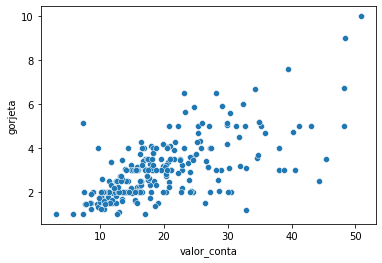

In [14]:
sns.scatterplot(x='valor_conta', y='gorjeta', data=gorjetas)

In [15]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_conta         244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

#### Criando o campo porcentagem

In [16]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_conta']
gorjetas['porcentagem'] = gorjetas['porcentagem'].round(2)
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


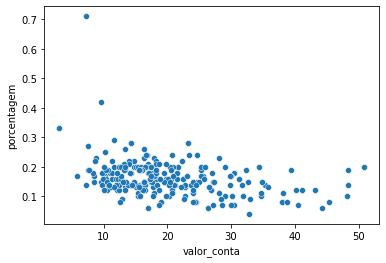

In [17]:
porcentagem_conta = sns.scatterplot(x='valor_conta', y='porcentagem', data=gorjetas)

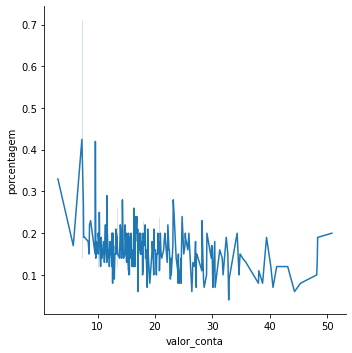

In [18]:
porcentagem_conta_linha = sns.relplot(x='valor_conta',y='porcentagem', data=gorjetas, kind='line')

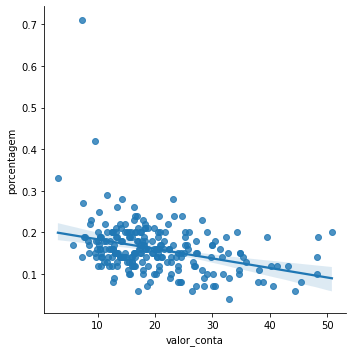

In [19]:
sns.lmplot(x='valor_conta',y='porcentagem', data=gorjetas)

### Análise 2 - Sobremesa

In [20]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [21]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


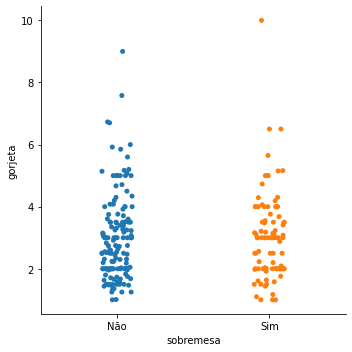

In [22]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

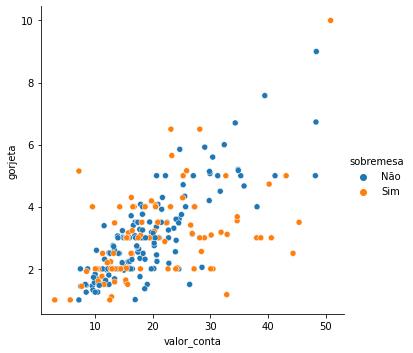

In [23]:
sns.relplot(x='valor_conta', y='gorjeta', data=gorjetas, hue='sobremesa')

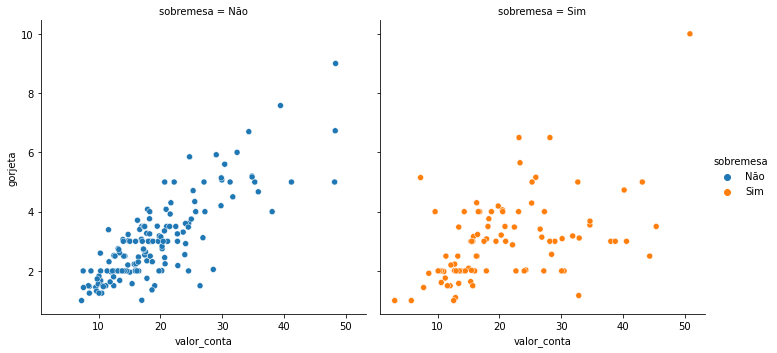

In [24]:
sns.relplot(x='valor_conta', y='gorjeta', data=gorjetas, hue='sobremesa', col='sobremesa')

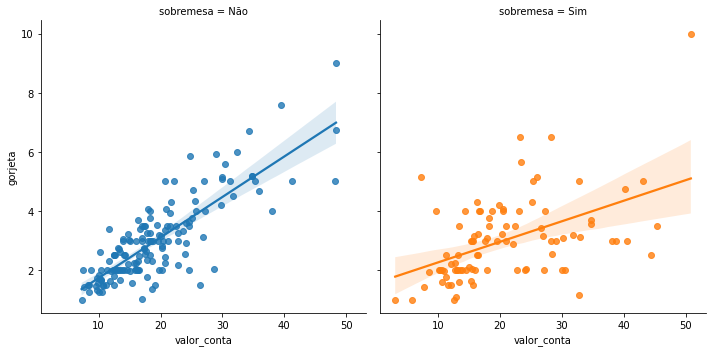

In [25]:
sns.lmplot(x='valor_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

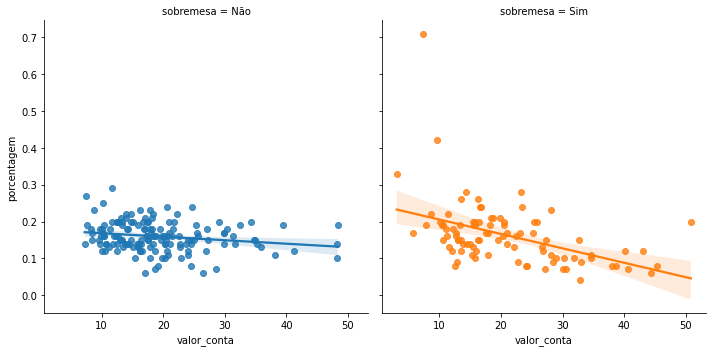

In [26]:
sns.lmplot(x='valor_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

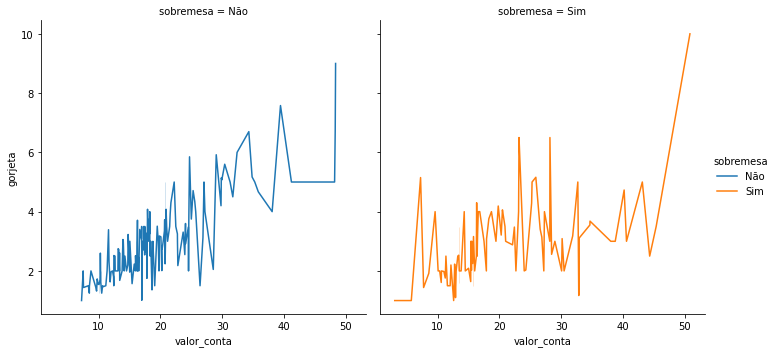

In [27]:
sns.relplot(x='valor_conta', y='gorjeta', data=gorjetas, hue='sobremesa', col='sobremesa', kind='line')

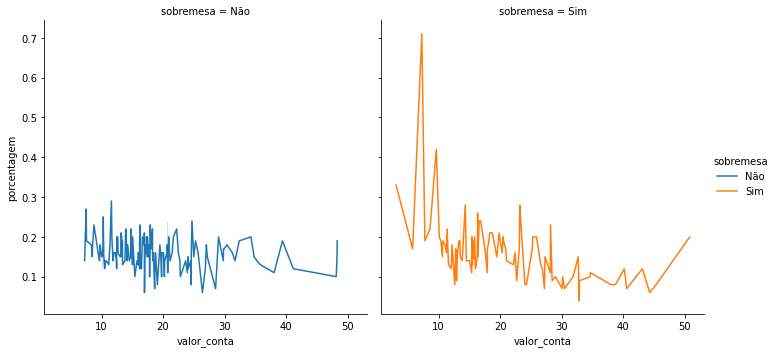

In [28]:
sns.relplot(x='valor_conta', y='porcentagem', data=gorjetas, hue='sobremesa', col='sobremesa', kind='line')

In [29]:
from scipy.stats import ranksums

In [30]:
sobremesa = gorjetas.query('sobremesa == "Sim"').porcentagem

sem_sobremesa = gorjetas.query('sobremesa == "Não"').porcentagem

In [31]:
r = ranksums(sobremesa, sem_sobremesa)

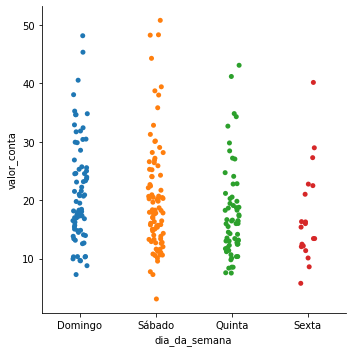

In [32]:
sns.catplot(x='dia_da_semana', y='valor_conta', data=gorjetas)

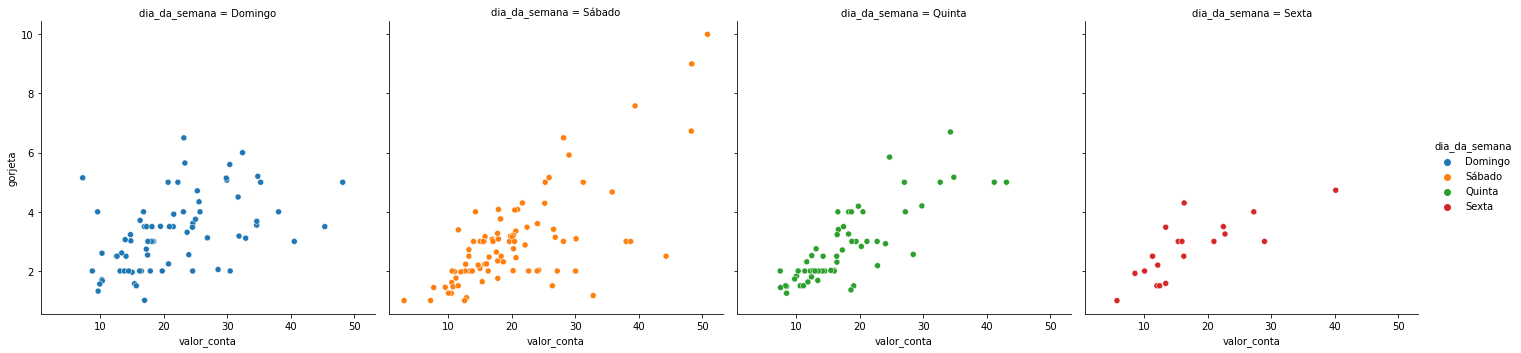

In [33]:
sns.relplot(x='valor_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas,  col='dia_da_semana')

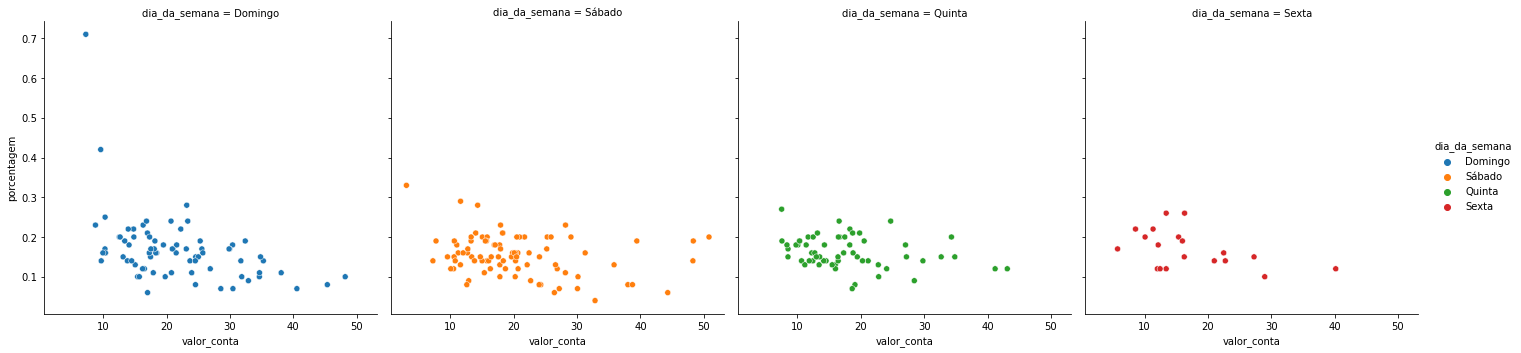

In [34]:
sns.relplot(x='valor_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas,  col='dia_da_semana')

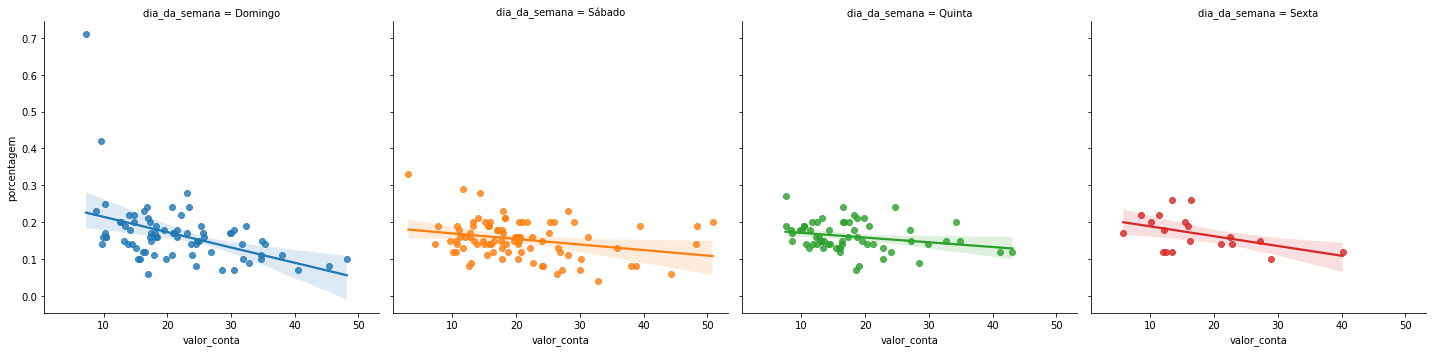

In [35]:
sns.lmplot(x='valor_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas,  col='dia_da_semana')

In [36]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print(f'A média geral das gorjetas é de {media_geral_gorjetas}')

A média geral das gorjetas é de 2.9982786885245902


In [37]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_conta','gorjeta','porcentagem']]

,valor_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [38]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

### Teste de Hipotese

In [39]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_conta

In [40]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_conta

In [41]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_conta

In [42]:
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

In [43]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


### Análise 4 - Hora do Dia

In [44]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

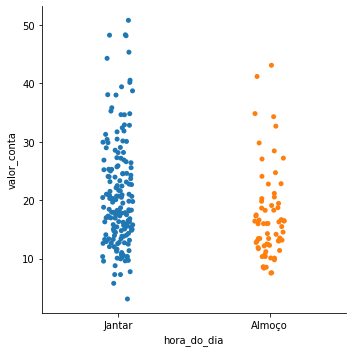

In [46]:
sns.catplot(x='hora_do_dia', y='valor_conta', data=gorjetas)

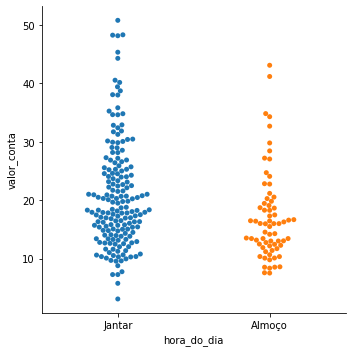

In [48]:
sns.catplot(x='hora_do_dia', y='valor_conta', kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_conta'>

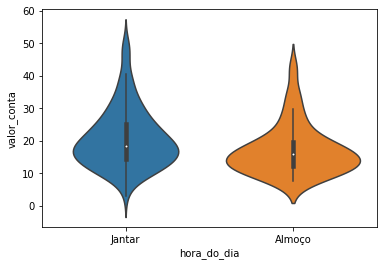

In [50]:
sns.violinplot(x='hora_do_dia', y='valor_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_conta'>

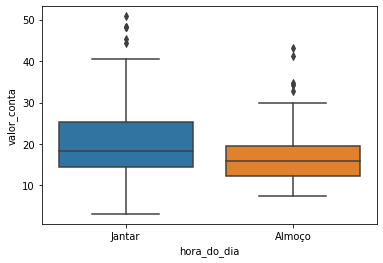

In [51]:
sns.boxplot(x='hora_do_dia', y='valor_conta', data=gorjetas)

In [52]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_conta

<AxesSubplot:xlabel='valor_conta', ylabel='Count'>

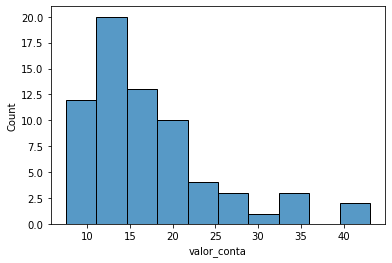

In [54]:
sns.histplot(almoco)

In [56]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_conta

<AxesSubplot:xlabel='valor_conta', ylabel='Count'>

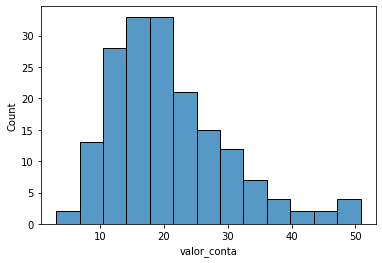

In [58]:
sns.histplot(jantar)

In [59]:
gorjetas.groupby(['hora_do_dia']).mean()

,valor_conta,gorjeta,total_de_pessoas,porcentagem
hora_do_dia,,,,
Almoço,17.168676,2.728088,2.411765,0.163971
Jantar,20.797159,3.102670,2.630682,0.159773


In [61]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_conta', 'gorjeta', 'porcentagem']]

,valor_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


In [63]:
r2 = ranksums(jantar, almoco)
print(f'O valor do p-value é de {r2.pvalue}')

O valor do p-value é de 0.0011791039723641672


In [64]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [65]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [66]:
ranksums(porcentagem_almoco, porcentagem_jantar)

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)

In [67]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)
print(f'O valor do p-value é de {r3.pvalue}')

O valor do p-value é de 0.2602493995587126
